# 0. Wstęp

Notatnik służy do analizy możliwości pracy z dużymi datasetami na lokalnych komputerach. Obejmuje benchmark dostępnej pamięci, analizę zużycia pamięci przez różne datasety, symulację operacji na danych oraz test maksymalnej liczby wierszy możliwej do wczytania w pamięci RAM.

## Jak Używać Notatnika?
- Uruchom test pamięci RAM (Sekcja 1) – poznaj ilość dostępnej pamięci.
- Poznaj datasety (Sekcja 2) – zrozum ich wymagania pamięciowe.
- Symuluj operacje na danych (Sekcja 3) – jeśli chcesz przetestować wydajność przy określonej liczbie wierszy.
- Wykonaj test maksymalnej liczby wierszy (Sekcja 4) – jeśli chcesz dowiesz się, ile danych możesz przetworzyć.


# 1. Ile mam RAM - podstawowy benchmark

`psutil` niewielka biblioteka, którą należy zainstalować przed wykonaniem testu.

! pip install psutil

In [2]:
import psutil

# Pobierz dane o pamięci
memory = psutil.virtual_memory()

# Wyświetl dostępne informacje
print(f"Całkowita pamięć RAM: {memory.total / (1024 ** 3):.2f} GB")
print(f"Dostępna pamięć RAM: {memory.available / (1024 ** 3):.2f} GB")
print(f"Zajęta pamięć RAM: {memory.used / (1024 ** 3):.2f} GB")
print(f"Procent użytej pamięci RAM: {memory.percent}%")

Całkowita pamięć RAM: 31.83 GB
Dostępna pamięć RAM: 16.15 GB
Zajęta pamięć RAM: 15.68 GB
Procent użytej pamięci RAM: 49.3%


# 2. Benchamrk datasetów z Kaggle

- Dla każdego datasetu sprawdzany jest rozmiar pliku, liczba wierszy i kolumn oraz pamięć zajmowana po wczytaniu do DataFrame.
- Dane wyjściowe są zapisywane w podsumowaniu, wyświetlane, zapisywane do csv
- Dane są już przetworzone więc można się zapoznać pod kodem

Wczytywanie Multistore 2019-Oct...
Wczytywanie Multistore 2019-Nov...
Wczytywanie Multistore 2019-Dec...
Wczytywanie Multistore 2020-Jan...
Wczytywanie Multistore 2020-Feb...
Wczytywanie Multistore 2020-Mar...
Wczytywanie Multistore 2020-Apr...
Wczytywanie Electronic transactions...
Wczytywanie Electronic events...
Wczytywanie Direct messaging campaigns...
Wczytywanie Direct messaging client firt purchase...
Wczytywanie Direct messaging holidays...
Wczytywanie Direct messaging demo...


C:\Users\nazwa\AppData\Local\Temp\ipykernel_11268\2643811359.py:49: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Wczytywanie Cosmetic 2019-Oct...
Wczytywanie Cosmetic 2019-Nov...
Wczytywanie Cosmetic 2019-Dec...
Wczytywanie Cosmetic 2020-Jan...
Wczytywanie Cosmetic 2020-Feb...
Wczytywanie Jewelery...
Podsumowanie danych:
                                  Dataset  File Size (MB)      Rows  Columns  \
0                     Multistore 2019-Oct         5406.01  42448764        9   
1                     Multistore 2019-Nov         8589.52  67501979        9   
2                     Multistore 2019-Dec         8924.47  67542878        9   
3                     Multistore 2020-Jan         7417.67  55967041        9   
4                     Multistore 2020-Feb         7319.98  55318565        9   
5                     Multistore 2020-Mar         7461.39  56341241        9   
6                     Multistore 2020-Apr         8837.92  66589268        9   
7                 Electronic transactions          284.81   2633521        8   
8                       Electronic events          100.86    885129   

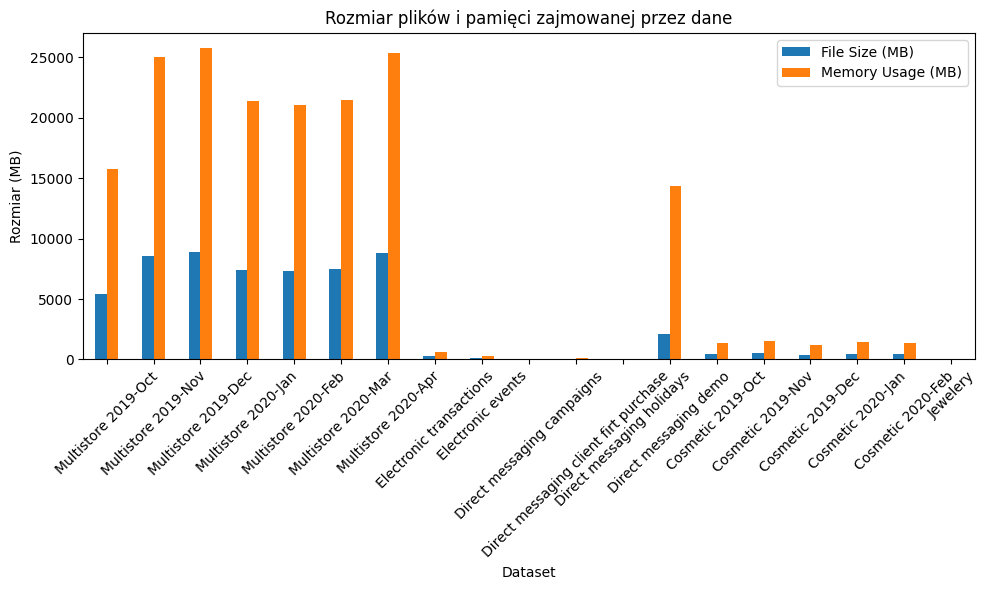

In [3]:
# Importowanie bibliotek
import os
import pandas as pd
import psutil

# Funkcja do obliczenia rozmiaru pliku w MB
def get_file_size(file_path):
    size = os.path.getsize(file_path) / (1024 ** 2)  # Rozmiar w MB
    return round(size, 2)

# Funkcja do obliczenia pamięci zajmowanej przez DataFrame
def get_dataframe_memory_usage(df):
    memory = df.memory_usage(deep=True).sum() / (1024 ** 2)  # Rozmiar w MB
    return round(memory, 2)

# Lista ścieżek do plików z danymi
datasets = {
    "Multistore 2019-Oct": "./data/2019-Oct.csv",
    "Multistore 2019-Nov": "./data/2019-Nov.csv",
    "Multistore 2019-Dec": "./data/2019-Dec.csv",
    "Multistore 2020-Jan": "./data/2020-Jan.csv",
    "Multistore 2020-Feb": "./data/2020-Feb.csv",
    "Multistore 2020-Mar": "./data/2020-Mar.csv",
    "Multistore 2020-Apr": "./data/2020-Apr.csv",
    "Electronic transactions": "./data/electronic/kz.csv",
    "Electronic events": "./data/electronic/events.csv",
    "Direct messaging campaigns": "./data/direct_messaging/campaigns.csv",
    "Direct messaging client firt purchase": "./data/direct_messaging/client_first_purchase_date.csv",
    "Direct messaging holidays": "./data/direct_messaging/holidays.csv",
    "Direct messaging demo": "./data/direct_messaging/messages-demo.csv",
    "Cosmetic 2019-Oct": "./data/cosmetics/2019-Oct.csv",
    "Cosmetic 2019-Nov": "./data/cosmetics/2019-Nov.csv",
    "Cosmetic 2019-Dec": "./data/cosmetics/2019-Dec.csv",
    "Cosmetic 2020-Jan": "./data/cosmetics/2020-Jan.csv",
    "Cosmetic 2020-Feb": "./data/cosmetics/2020-Feb.csv",
    "Jewelery": "./data/jewelry/jewelry.csv",
}

# Analiza danych
summary = []

for name, path in datasets.items():
    try:
        # Obliczanie rozmiaru pliku
        file_size = get_file_size(path)
        
        # Wczytywanie danych
        print(f"Wczytywanie {name}...")
        df = pd.read_csv(path)
        
        # Obliczanie liczby wierszy i kolumn
        num_rows, num_cols = df.shape
        
        # Obliczanie pamięci zajmowanej przez DataFrame
        memory_usage = get_dataframe_memory_usage(df)
        
        # Dodanie informacji do podsumowania
        summary.append({
            "Dataset": name,
            "File Size (MB)": file_size,
            "Rows": num_rows,
            "Columns": num_cols,
            "Memory Usage (MB)": memory_usage
        })
        
    except Exception as e:
        print(f"Nie udało się przetworzyć {name}: {e}")

# Tworzenie podsumowania w formie DataFrame
summary_df = pd.DataFrame(summary)

# Wyświetlenie podsumowania
print("Podsumowanie danych:")
print(summary_df)

# Eksport do pliku CSV (opcjonalnie)
summary_df.to_csv("datasets_summary.csv", index=False)

# Wizualizacja danych (opcjonalnie)
import matplotlib.pyplot as plt

summary_df.set_index("Dataset")[["File Size (MB)", "Memory Usage (MB)"]].plot(kind="bar", figsize=(10, 6))
plt.title("Rozmiar plików i pamięci zajmowanej przez dane")
plt.ylabel("Rozmiar (MB)")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
summary_df

,Dataset,File Size (MB),Rows,Columns,Memory Usage (MB)
0,Multistore 2019-Oct,5406.01,42448764,9,15743.62
1,Multistore 2019-Nov,8589.52,67501979,9,25028.22
2,Multistore 2019-Dec,8924.47,67542878,9,25750.20
3,Multistore 2020-Jan,7417.67,55967041,9,21379.60
4,Multistore 2020-Feb,7319.98,55318565,9,21064.73
5,Multistore 2020-Mar,7461.39,56341241,9,21449.76
6,Multistore 2020-Apr,8837.92,66589268,9,25390.69
7,Electronic transactions,284.81,2633521,8,612.26
8,Electronic events,100.86,885129,9,308.00
9,Direct messaging campaigns,0.24,1907,19,1.24


# 3. Symulacja wczytania datasetu + operacje

- Testowanie wydajności systemu podczas wczytywania dużych danych i wykonywania operacji grupujących.

Działanie:
- Tworzenie sztucznego datasetu z podaną liczbą wierszy.
- Operacja grupowania danych (groupby) na kolumnie i obliczanie średniej wartości.
- Wyświetlenie informacji o pamięci RAM przed i po operacji.
- Czas wykonania: 10–15 minut (dla dużych datasetów).

**Parametry**: Liczba wierszy n_rows podawana przez użytkownika (tutaj na 66 milionach wierszy)

In [5]:
import pandas as pd
import numpy as np
import psutil
import time
import gc  # Garbage collection

def system_performance(message=""):
    """Wyświetla statystyki pamięci systemowej."""
    memory = psutil.virtual_memory()
    print(f"\n{message}")
    print(f"Całkowita pamięć RAM: {memory.total / (1024 ** 3):.2f} GB")
    print(f"Dostępna pamięć RAM: {memory.available / (1024 ** 3):.2f} GB")
    print(f"Zajęta pamięć RAM: {memory.used / (1024 ** 3):.2f} GB")
    print(f"Procent użytej pamięci RAM: {memory.percent}%")

def test_large_dataframe(n_rows=10_000_000):
    """Test wydajności pracy z dużym dataframe."""
    system_performance("Przed testem systemu")

    # Tworzenie dataframe
    print("\nTworzenie dataframe...")
    start_time = time.time()
    data = {
        'event_time': pd.date_range(start='2022-01-01', periods=n_rows, freq='s').astype(str),
        'event_type': np.random.choice(['view', 'cart', 'purchase'], size=n_rows),
        'product_id': np.random.randint(1000, 5000, size=n_rows),
        'category_id': np.random.randint(100, 500, size=n_rows),
        'category_code': np.random.choice(['electronics', 'clothing', 'home'], size=n_rows),
        'brand': np.random.choice(['brand_a', 'brand_b', 'brand_c'], size=n_rows),
        'price': np.random.uniform(10, 500, size=n_rows),
        'user_id': np.random.randint(1, 1000000, size=n_rows),
        'user_session': np.random.randint(1, 100000, size=n_rows).astype(str),
    }
    df = pd.DataFrame(data)
    print(f"Dataframe utworzony w {time.time() - start_time:.2f} sekund.")
    print(f"Zajęta pamięć przez dataframe: {df.memory_usage(deep=True).sum() / (1024 ** 3):.2f} GB")
    system_performance("Po stworzeniu dataframe")

    # Operacje na dataframe
    print("\nRozpoczęcie testu operacji...")
    start_time = time.time()
    grouped = df.groupby('event_type').price.mean()
    print(f"Operacja grupowania zakończona w {time.time() - start_time:.2f} sekund.")
    print(grouped)

    # Wymuszenie zwolnienia pamięci
    del df
    gc.collect()
    system_performance("Po zakończeniu testu i zwolnieniu pamięci")

# Uruchomienie testu z określoną liczbą wierszy
test_large_dataframe(n_rows=66_589_268)  # Możesz zmienić n_rows na mniejszą liczbę dla testów


Przed testem systemu
Całkowita pamięć RAM: 31.83 GB
Dostępna pamięć RAM: 23.42 GB
Zajęta pamięć RAM: 8.42 GB
Procent użytej pamięci RAM: 26.4%

Tworzenie dataframe...
Dataframe utworzony w 471.55 sekund.
Zajęta pamięć przez dataframe: 21.64 GB

Po stworzeniu dataframe
Całkowita pamięć RAM: 31.83 GB
Dostępna pamięć RAM: 3.05 GB
Zajęta pamięć RAM: 28.78 GB
Procent użytej pamięci RAM: 90.4%

Rozpoczęcie testu operacji...
Operacja grupowania zakończona w 9.40 sekund.
event_type
cart        254.964433
purchase    255.024734
view        254.976487
Name: price, dtype: float64

Po zakończeniu testu i zwolnieniu pamięci
Całkowita pamięć RAM: 31.83 GB
Dostępna pamięć RAM: 20.87 GB
Zajęta pamięć RAM: 10.96 GB
Procent użytej pamięci RAM: 34.4%


# 4. Test maksymalnej liczby wierszy, które można wczytać

- Cel: Określenie maksymalnej liczby wierszy możliwych do wczytania na komputerze przed wyczerpaniem pamięci.

**Działanie:**
- Iteracyjne zwiększanie liczby wierszy w sztucznym DataFrame aż do momentu braku pamięci.
- Informacja o dostępnej pamięci RAM przed każdą iteracją.
- Automatyczne zwalnianie pamięci po każdej próbie.
- Czas wykonania: Około 10 minut na iterację. (np. 6 x 10 min po 1 mln to 6 mln wierszy w godzinę, zacząć od większych liczb )

Parametry wejściowe:
- Początkowa liczba wierszy (n_rows).
- Krok zwiększania (step).


In [ ]:
import pandas as pd
import numpy as np
import psutil
import gc
import time

def memory_usage():
    """Funkcja do monitorowania pamięci RAM."""
    memory = psutil.virtual_memory()
    return memory.available / (1024 ** 3)  # Dostępna pamięć RAM w GB

def test_maximum_data():
    """Funkcja do sprawdzania maksymalnej liczby wierszy, które można wczytać."""
    n_rows = 75_000_000  # Startowa liczba wierszy
    step = 1_000_000    # Krok zwiększania liczby wierszy
    max_rows = 0
    df = None
    
    try:
        print("Rozpoczęcie testu maksymalnej liczby wierszy...")
        while True:
            # Sprawdzenie dostępnej pamięci przed utworzeniem nowej partii
            available_memory = memory_usage()
            print(f"Dostępna pamięć RAM: {available_memory:.2f} GB")
            
            # Tworzenie nowej partii danych
            print(f"Tworzenie dataframe z {n_rows} wierszami...")
            df = pd.DataFrame({
                'event_time': pd.date_range(start='2022-01-01', periods=n_rows, freq='s').astype(str),
                'event_type': np.random.choice(['view', 'cart', 'purchase'], n_rows),
                'product_id': np.random.randint(1, 10000, n_rows),
                'category_id': np.random.randint(1, 500, n_rows),
                'category_code': np.random.choice(['electronics', 'apparel', 'home', 'beauty'], n_rows),
                'brand': np.random.choice(['brand1', 'brand2', 'brand3', 'brand4'], n_rows),
                'price': np.random.uniform(1, 100, n_rows),
                'user_id': np.random.randint(1, 100000, n_rows),
                'user_session': np.random.randint(1, 100000, n_rows).astype(str)
            })
            print(f"Dataframe utworzony, zajęta pamięć: {df.memory_usage(deep=True).sum() / (1024 ** 3):.2f} GB")
            
            max_rows = n_rows
            n_rows += step
            
            # Zwalnianie pamięci po każdej iteracji (opcjonalnie dla dużych testów)
            del df
            gc.collect()
            time.sleep(1)
    except MemoryError:
        print("Brak pamięci! Przerywanie testu.")
    except Exception as e:
        print(f"Test zakończony z błędem: {e}")
    finally:
        print(f"Maksymalna liczba wierszy możliwa do wczytania: {max_rows}")
        return max_rows

# Wywołanie testu
max_rows_possible = test_maximum_data()

Rozpoczęcie testu maksymalnej liczby wierszy...
Dostępna pamięć RAM: 24.63 GB
Tworzenie dataframe z 75000000 wierszami...
Dataframe utworzony, zajęta pamięć: 24.25 GB
Dostępna pamięć RAM: 25.60 GB
Tworzenie dataframe z 76000000 wierszami...
Dataframe utworzony, zajęta pamięć: 24.58 GB
Dostępna pamięć RAM: 24.34 GB
Tworzenie dataframe z 77000000 wierszami...
Dataframe utworzony, zajęta pamięć: 24.90 GB
Dostępna pamięć RAM: 25.91 GB
Tworzenie dataframe z 78000000 wierszami...
Dataframe utworzony, zajęta pamięć: 25.22 GB
Dostępna pamięć RAM: 26.59 GB
Tworzenie dataframe z 79000000 wierszami...
